In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ======================================================
# 1. GENERAR DATOS SIMULADOS PARA EMPLEADOS
# ======================================================
np.random.seed(101)  # Usamos otra semilla para nuevos datos
n = 10  # Número de empleados

# Horas trabajadas al día (entre 4 y 12)
horas_trabajo = np.random.uniform(4, 12, n)

# Relación lineal: Desempeño = 5 + 8*horas + ruido
# Se asume un desempeño base (5%) y un incremento por hora trabajada (8%).
# El ruido añade variabilidad realista (motivación, cansancio, etc.).
ruido = np.random.uniform(-10, 10, n)
desempeno = 5 + 8 * horas_trabajo + ruido

# Crear el DataFrame
data = pd.DataFrame({'Horas_Trabajadas': horas_trabajo, 'Desempeno': desempeno})

print("=== CONJUNTO DE DATOS GENERADO ===")
print(data)
print("\n")

=== CONJUNTO DE DATOS GENERADO ===
   Horas_Trabajadas  Desempeno
0          8.131189  71.134064
1          8.565341  70.565365
2          4.227794  32.460199
3          5.372173  53.689421
4          9.482216  90.167391
5         10.671175  85.016472
6          6.455730  48.317067
7         11.148905  96.262206
8          9.772351  87.758662
9          5.519512  44.680870




In [2]:
# ======================================================
# 2. DEFINIR VARIABLES Y ENTRENAR EL MODELO
# ======================================================
X = data[['Horas_Trabajadas']]  # Predictor
y = data['Desempeno']           # Respuesta
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes del modelo aprendido
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print("=== PARÁMETROS DEL MODELO APRENDIDO ===")
print(f"Intercepto (β₀): {beta_0:.4f}")
print(f"Pendiente (β₁): {beta_1:.4f}")
print(f"Modelo de Desempeño: Desempeño = {beta_0:.4f} + {beta_1:.4f} * Horas_Trabajadas\n")


=== PARÁMETROS DEL MODELO APRENDIDO ===
Intercepto (β₀): -2.3300
Pendiente (β₁): 8.8643
Modelo de Desempeño: Desempeño = -2.3300 + 8.8643 * Horas_Trabajadas



In [3]:
# ======================================================
# 3. EVALUACIÓN DEL MODELO
# ======================================================
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

=== EVALUACIÓN DEL MODELO ===
Coeficiente de Determinación (R²): 0.9381
Root Mean Squared Error (RMSE): 5.2122



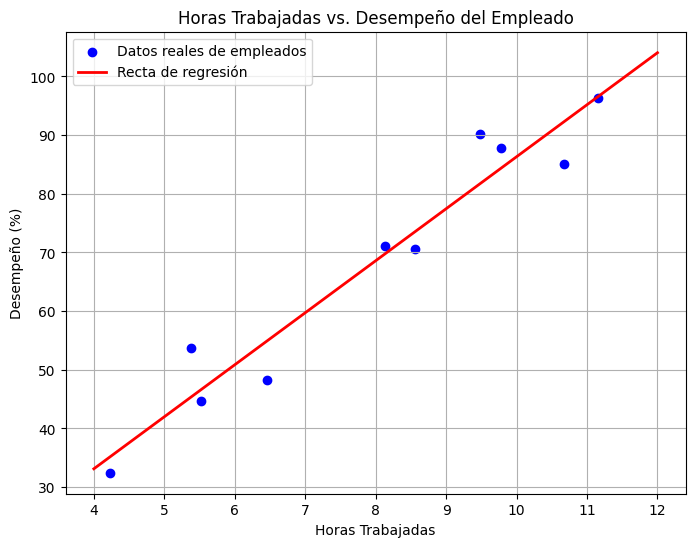

In [4]:
# ======================================================
# 4. GRÁFICO Y NUEVAS PREDICCIONES
# ======================================================
# Puntos para dibujar la recta del modelo en todo el dominio (4 a 12 horas)
X_linea = pd.DataFrame(np.linspace(4, 12, 100), columns=["Horas_Trabajadas"])
y_pred_linea = modelo.predict(X_linea)

# Gráfico de dispersión y recta ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x='Horas_Trabajadas', y='Desempeno', data=data, color='blue', label='Datos reales de empleados')
plt.plot(X_linea, y_pred_linea, color='red', linewidth=2, label='Recta de regresión')
plt.title('Horas Trabajadas vs. Desempeño del Empleado')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Desempeño (%)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Generar predicciones para horas específicas
nuevas_horas = pd.DataFrame({'Horas_Trabajadas': [4, 6, 8, 10, 12]})
nuevas_predicciones = modelo.predict(nuevas_horas)
predicciones_df = pd.DataFrame({'Horas_Trabajadas': nuevas_horas['Horas_Trabajadas'], 'Desempeno_Predicho': nuevas_predicciones})

print("=== NUEVAS PREDICCIONES ===")
print(predicciones_df)
print("\n")

=== NUEVAS PREDICCIONES ===
   Horas_Trabajadas  Desempeno_Predicho
0                 4           33.127256
1                 6           50.855907
2                 8           68.584558
3                10           86.313209
4                12          104.041860




=== ESTADÍSTICAS DE RESIDUOS ===
Media de residuos: 0.0000
Desviación estándar de residuos: 5.2122



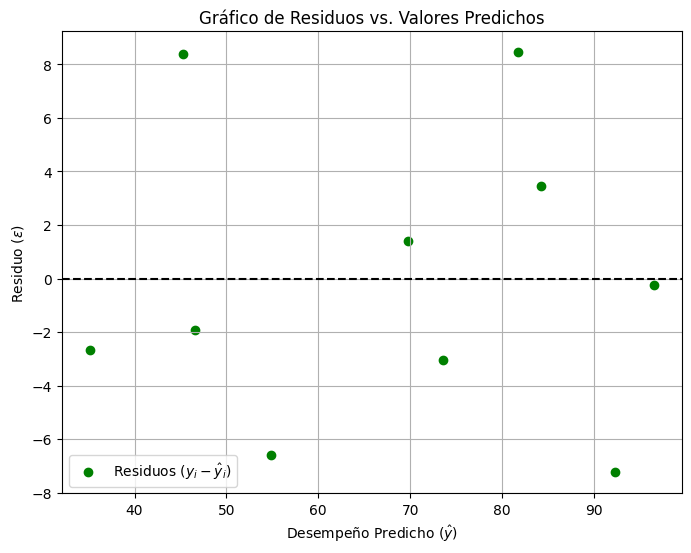

In [6]:
# ======================================================
# 5. ANÁLISIS DE RESIDUOS
# ======================================================
epsilon = y - y_pred  # El residuo es la diferencia entre el valor real y el predicho

media_epsilon = np.mean(epsilon)
estandar_epsilon = np.std(epsilon)

print("=== ESTADÍSTICAS DE RESIDUOS ===")
print(f"Media de residuos: {media_epsilon:.4f}")
print(f"Desviación estándar de residuos: {estandar_epsilon:.4f}\n")

# Gráfico de residuos para chequear homocedasticidad
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, epsilon, color='green', label='Residuos ($y_i - \\hat{y}_i$)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.xlabel('Desempeño Predicho ($\\hat{y}$)')
plt.ylabel('Residuo ($\\epsilon$)')
plt.grid(True)
plt.legend()
plt.show()

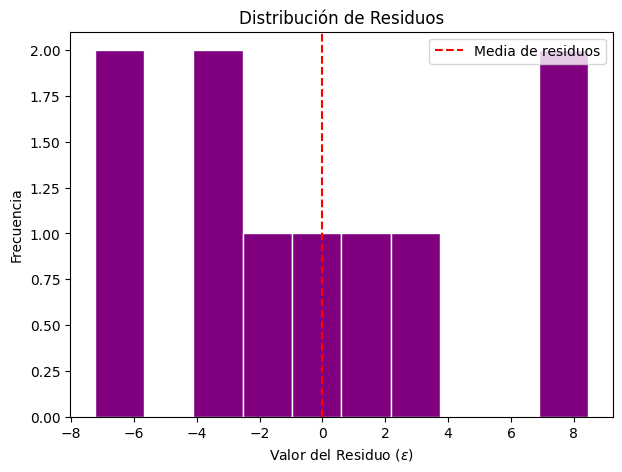

In [7]:
# Histograma de residuos para ver distribución
plt.figure(figsize=(7, 5))
plt.hist(epsilon, bins=10, color='purple', edgecolor='white')
plt.axvline(media_epsilon, color='red', linestyle='--', label='Media de residuos')
plt.title("Distribución de Residuos")
plt.xlabel('Valor del Residuo ($\\epsilon$)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()